# Fitting temperature to a Supernova model

#### imports

In [1]:
import sncosmo
import numpy as np
from scipy.optimize import fmin
import matplotlib.pyplot as plt
import functools
from scipy import constants

In [2]:
# Should be 2.9.0 - else "sugar" may not exist
sncosmo.__version__

'2.9.0'

In [3]:
# In case there is an arror on SUGAR, try SALT2
model=sncosmo.Model(source='sugar')
#model=sncosmo.Model(source='salt2')

In [4]:
model.parameters # z? T0, Xgr or equivalent, q1 q2 q3 A 

array([0.e+00, 0.e+00, 1.e-15, 0.e+00, 0.e+00, 0.e+00, 0.e+00])

In [5]:
model.param_names

['z', 't0', 'q0', 'q1', 'q2', 'q3', 'Av']

#### Fit a blackbody to the model

In [6]:
wave=model._source._wave
phase=model._source._phase

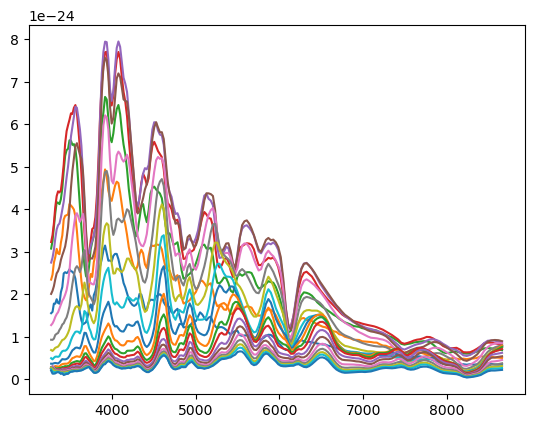

In [7]:
# spectral show-off
for p in phase:
    plt.plot(wave,model.flux(p,wave))

In [8]:
blackbody=lambda l,A,l0: A / ( l**5 * (np.exp(l0/l) -1) )

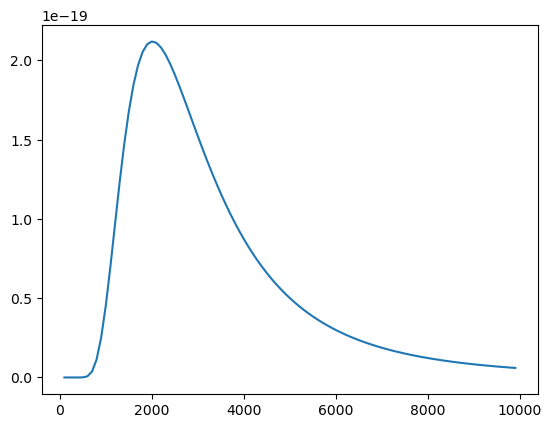

In [9]:
w = np.arange(100.,10000.,step=100)
plt.plot(w,blackbody(w,1,10000))

In [10]:
def chi2_l0(wave,flux,l0):    
    A = solve_A(wave,flux,l0)
    return np.sum((flux-blackbody(wave,A,l0))**2)

def chi2_l0_A(wave,flux,A,l0):    
    #A = solve_A(wave,flux,l0)
    return np.sum((flux-blackbody(wave,A,l0))**2)

def solve_A(wave,flux,l0):
    bb=blackbody(wave,1,l0)
    A = np.sum(flux*bb) / np.sum(bb*bb)
    return A

9.109987327714477e-05 [15261.11581922]
0.00013225923352455153 [14993.16930771]
0.0001831020137823857 [15040.90002179]
0.00024558537579679975 [15596.83191776]
0.0003196105142054759 [16597.53406048]
0.0003977122547598072 [17815.69415331]
0.0004250798496005504 [19030.47421575]
0.0004128093028767217 [19883.90958309]
0.0004025450713025434 [20869.84679103]
0.00042331451728545475 [22262.76066899]
0.0005051217927349994 [24182.04367161]
0.0006139018207897306 [26058.67391825]
0.0006901475223224926 [27447.00193405]
0.0007150927179690809 [28284.40153599]
0.0006474610750914602 [28668.67017746]
0.0005544041663166703 [28581.26556873]
0.0004320791683295807 [28077.46428251]
0.0003422945523265851 [27527.27884054]
0.0002852633966499107 [27112.00752854]
0.0002459251621522815 [26783.3622694]
0.00020398962893487143 [26264.0760541]


/var/folders/cn/h61jw3rs78x7rr95vj_w2t9c0000gp/T/ipykernel_44219/2219622572.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


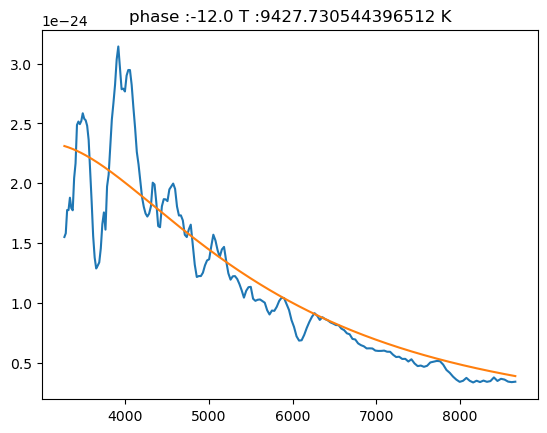

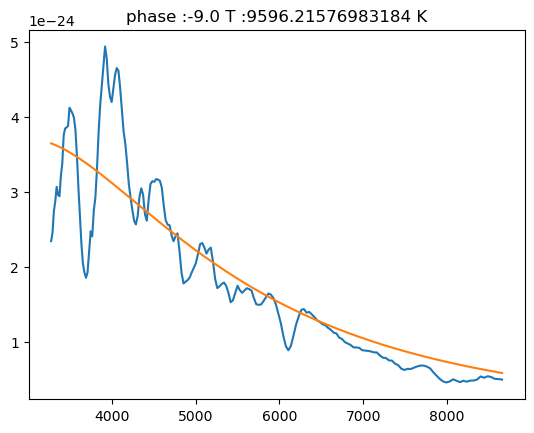

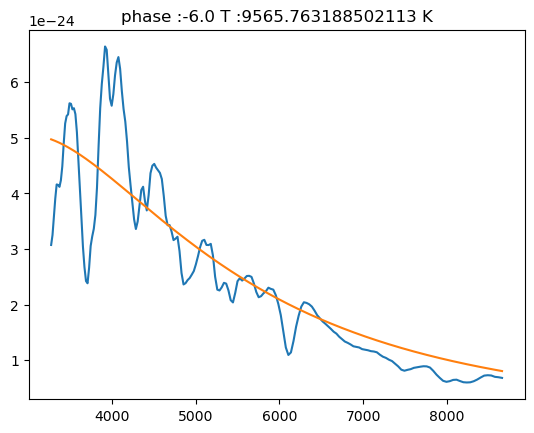

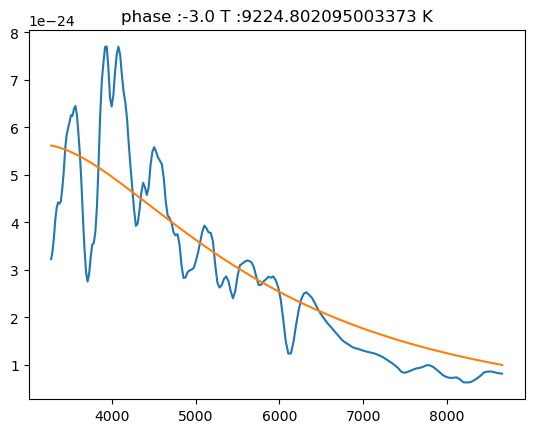

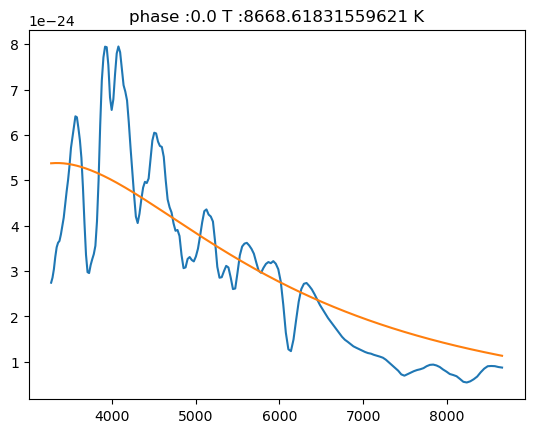

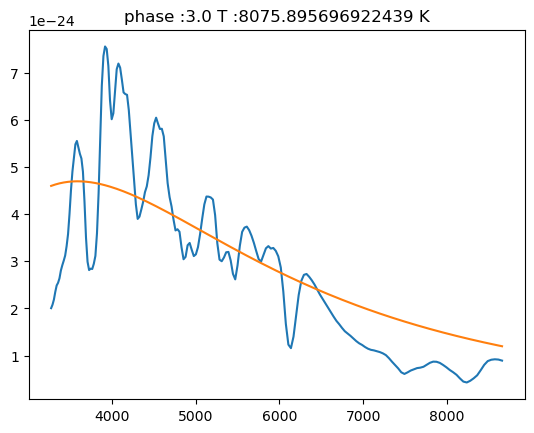

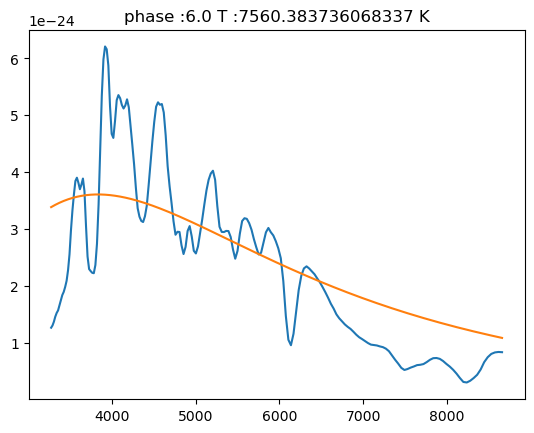

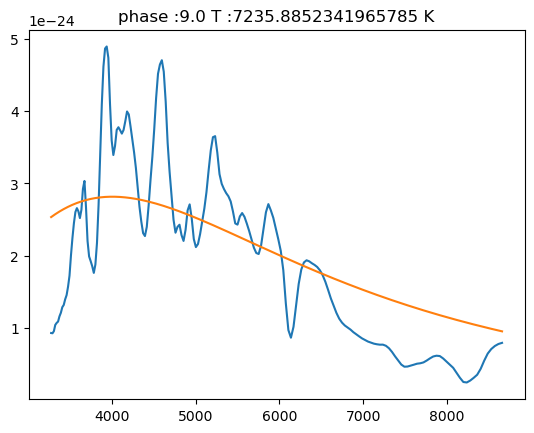

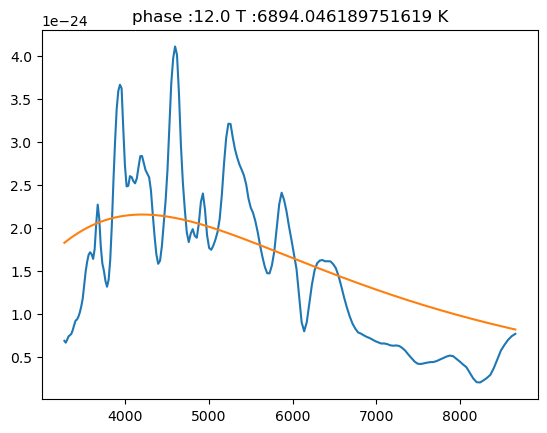

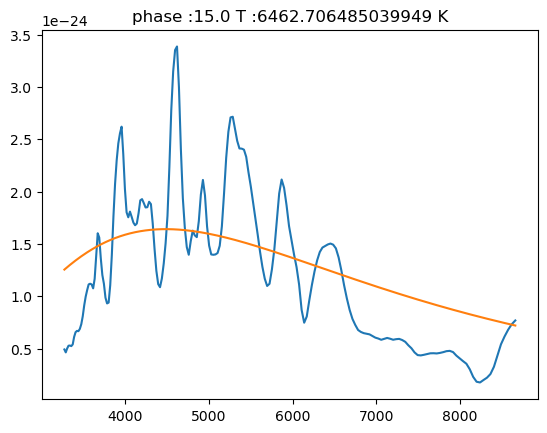

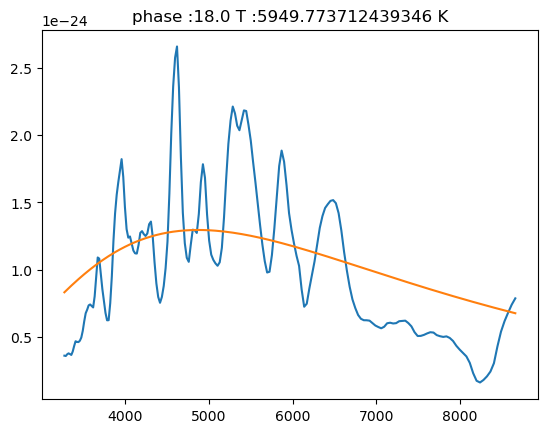

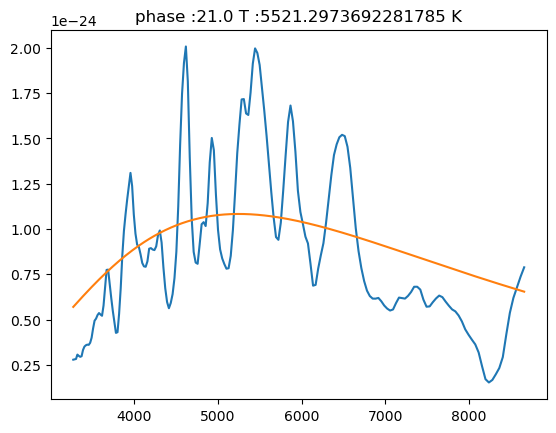

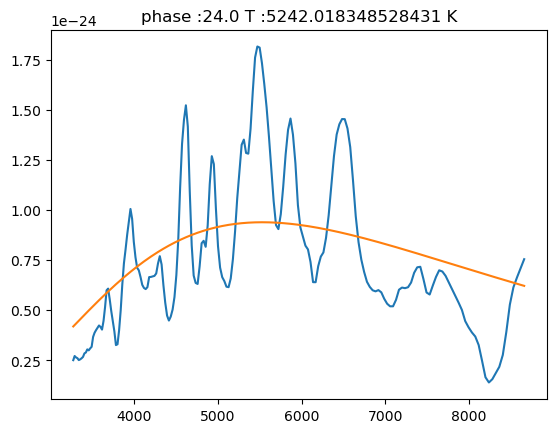

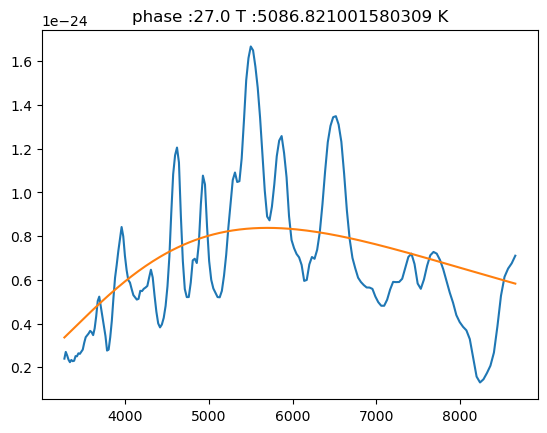

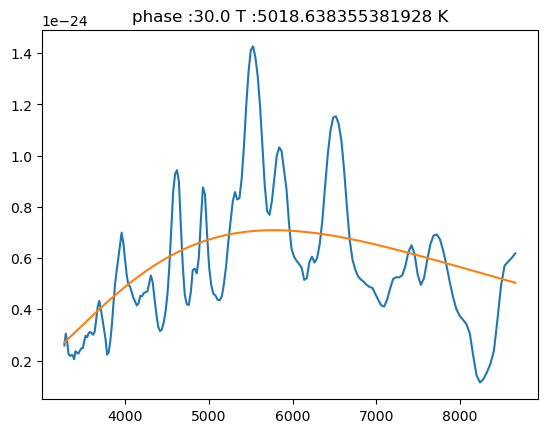

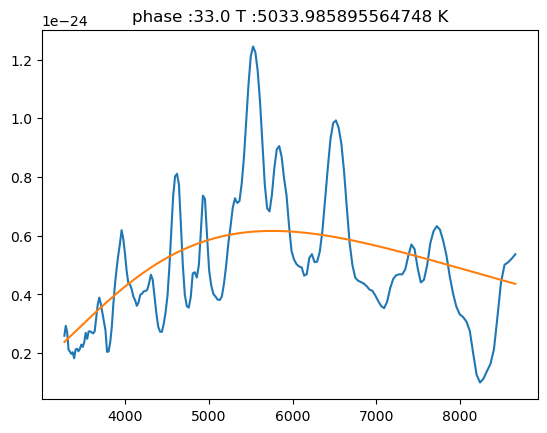

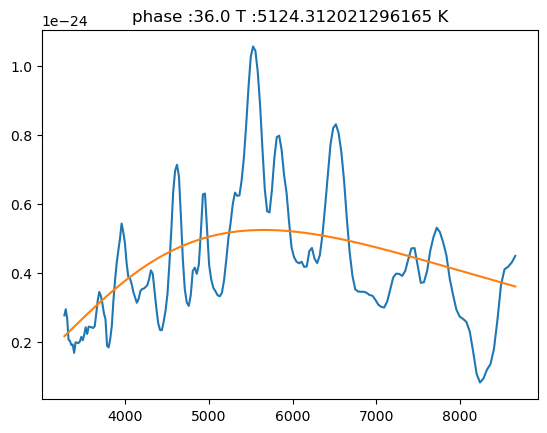

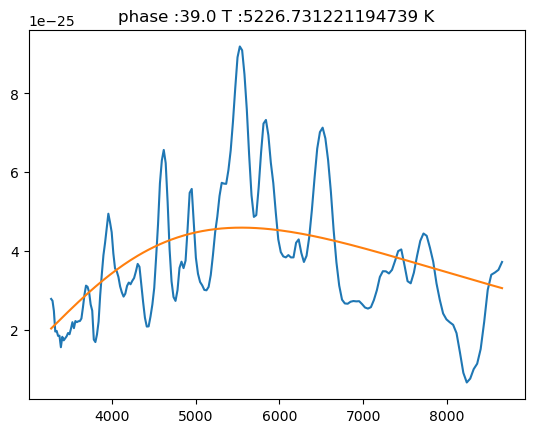

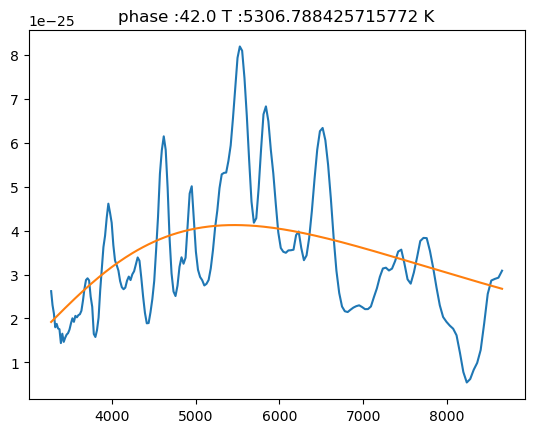

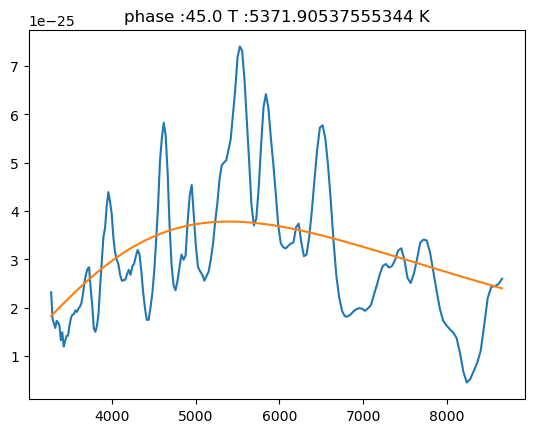

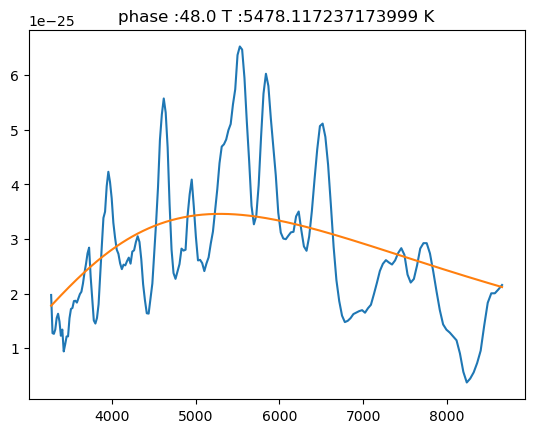

In [11]:
T_list=list()
A_list=list()
lam0_list=list()
for p in phase:
    flux=model.flux(p,wave)
    lam_0=fmin(functools.partial(chi2_l0,wave,flux),15000,disp=False)
    T = constants.c * constants.h / (  lam_0[0]*1e-10 *  constants.k )
    A=solve_A(wave,flux,lam_0)
    print (A,lam_0)
    
    lam0_list.append(lam_0[0])
    A_list.append(A)
    T_list.append(T)
    #break
    plt.figure()
    plt.plot(wave,flux)
    plt.plot(wave,blackbody(wave,A,lam_0))
    plt.title('phase :'+str(p)+' T :'+str(T)+' K')

### Results

Text(0.5, 1.0, 'Amplitudes')

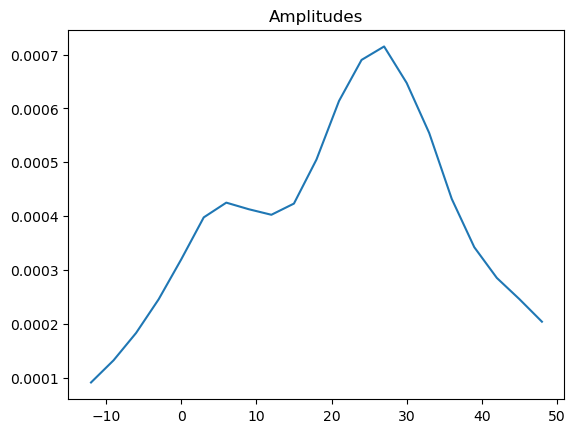

In [12]:
plt.plot(phase,A_list)
plt.title("Amplitudes")

Text(0.5, 1.0, 'Temperatures')

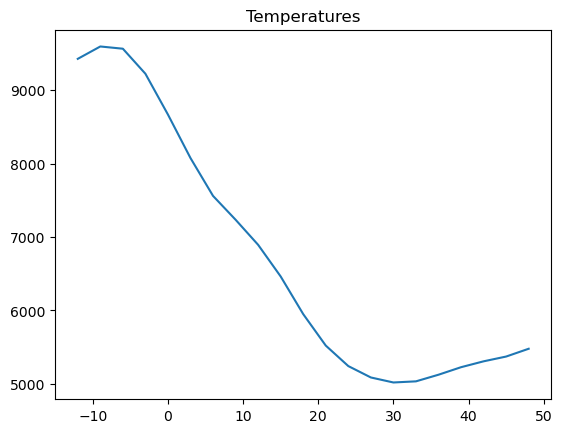

In [13]:
plt.plot(phase,T_list)
plt.title("Temperatures")